In [174]:
import matplotlib as mpl
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [43]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
act = pd.read_csv('/content/gdrive/MyDrive/2_act_info.csv')
cus = pd.read_csv('/content/gdrive/MyDrive/2_cus_info.csv')
iem = pd.read_csv('/content/gdrive/MyDrive/2_iem_info.csv')
trd_kr = pd.read_csv('/content/gdrive/MyDrive/2_trd_kr.csv')
trd_oss = pd.read_csv('/content/gdrive/MyDrive/2_trd_oss.csv')
#data_schema_vf.xlsx

In [45]:
# Y세대 : 1980~2000년생 (21살~40살) / Z세대 2001년생~ (1살~20살)

In [46]:
trd_oss

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


In [47]:
x = pd.read_excel('/content/gdrive/MyDrive/data_schema_vf.xlsx')

In [48]:
x

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"CUS_INFO.CSV(10,000건)",NaN,NaN,NaN,NaN,NaN
1,NaN,No,컬럼명,컬럼한글명,컬럼설명,예시,비고
2,NaN,1,CUS_ID,고객번호,고객을 구분할 수 있는 Unique값,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,고객을 구분할 수 있는 Unique 값
3,NaN,2,SEX_DIT_CD,성별,1: 남성 / 2: 여성,1,NaN
4,NaN,3,CUS_AGE,연령대,00: 19세 이하,10,연령대를 5세 단위로 군집화
...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,0: 영업점단말 / 1: 유선단말 / 2: 무선단말 / 3: HTS / 4: 기타,NaN,NaN
66,NaN,11,CUR_CD,거래통화코드,AUD: 오스트레일리아-달러 / CAD: 캐나다-달러 / CNY: 렌민비(위안) E...,AUD,NaN
67,NaN,NaN,NaN,NaN,JPY:일본-엔 / KRW: 대한민국-원 / SGD: 싱가포르-달러,NaN,NaN
68,NaN,NaN,NaN,NaN,USD: 미국-달러 / VND: 동,NaN,NaN


In [49]:
cus['sex_dit_cd']

0       2
1       2
2       1
3       1
4       1
       ..
9995    2
9996    2
9997    2
9998    1
9999    1
Name: sex_dit_cd, Length: 10000, dtype: int64

In [50]:
# 1남성 / 2여성
sex_counts = cus['sex_dit_cd'].value_counts()

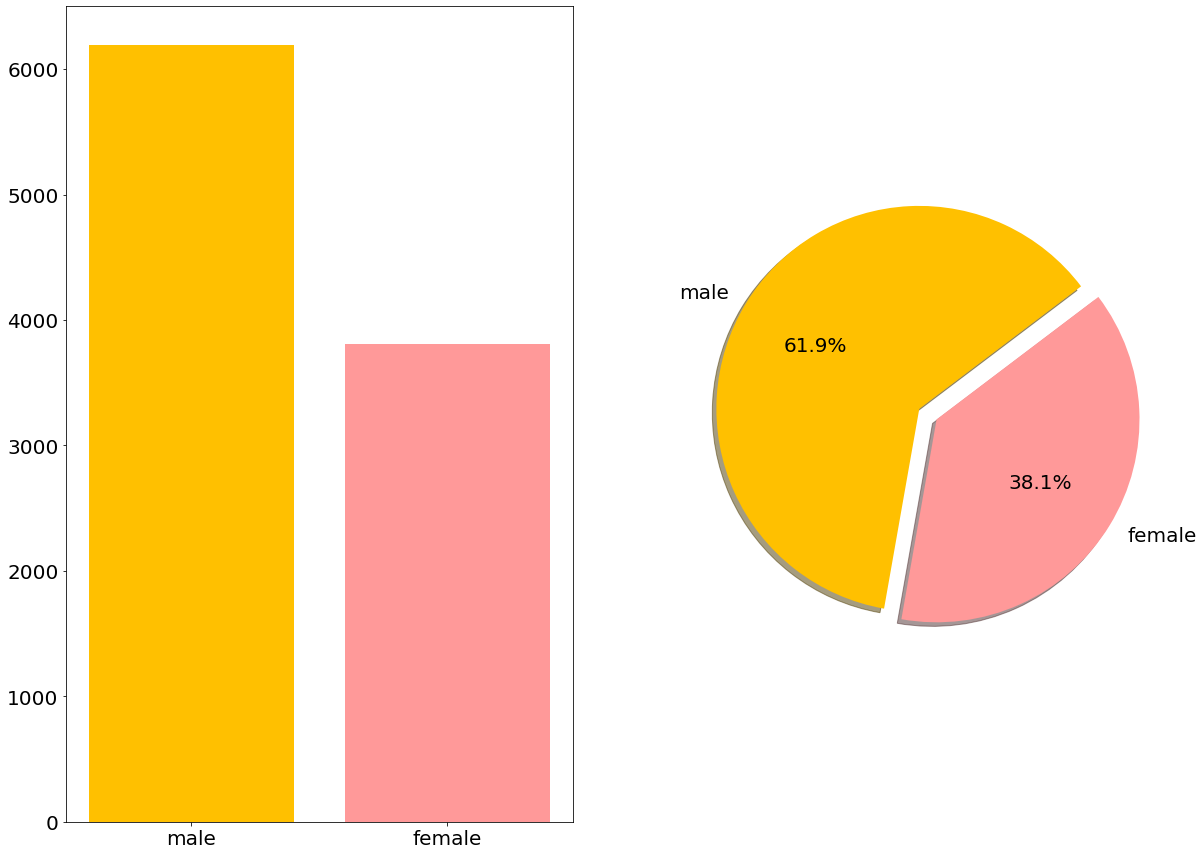

In [51]:
explode = [0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['#ffc000', '#ff9999']


fig, ax = plt.subplots(1,2,figsize=(20,15))


ax[0].bar(['male', 'female'],[sex_counts[1], sex_counts[2]], color = colors)
ax[1].pie([sex_counts[1], sex_counts[2]], labels=['male', 'female'], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 25}


#plt.scatter(['male', 'female'], [sex_counts[1], sex_counts[2]], marker= 'o', s=400, color= 'red', alpha=0.5)
plt.rcParams.update({'font.size': 20})

plt.show()

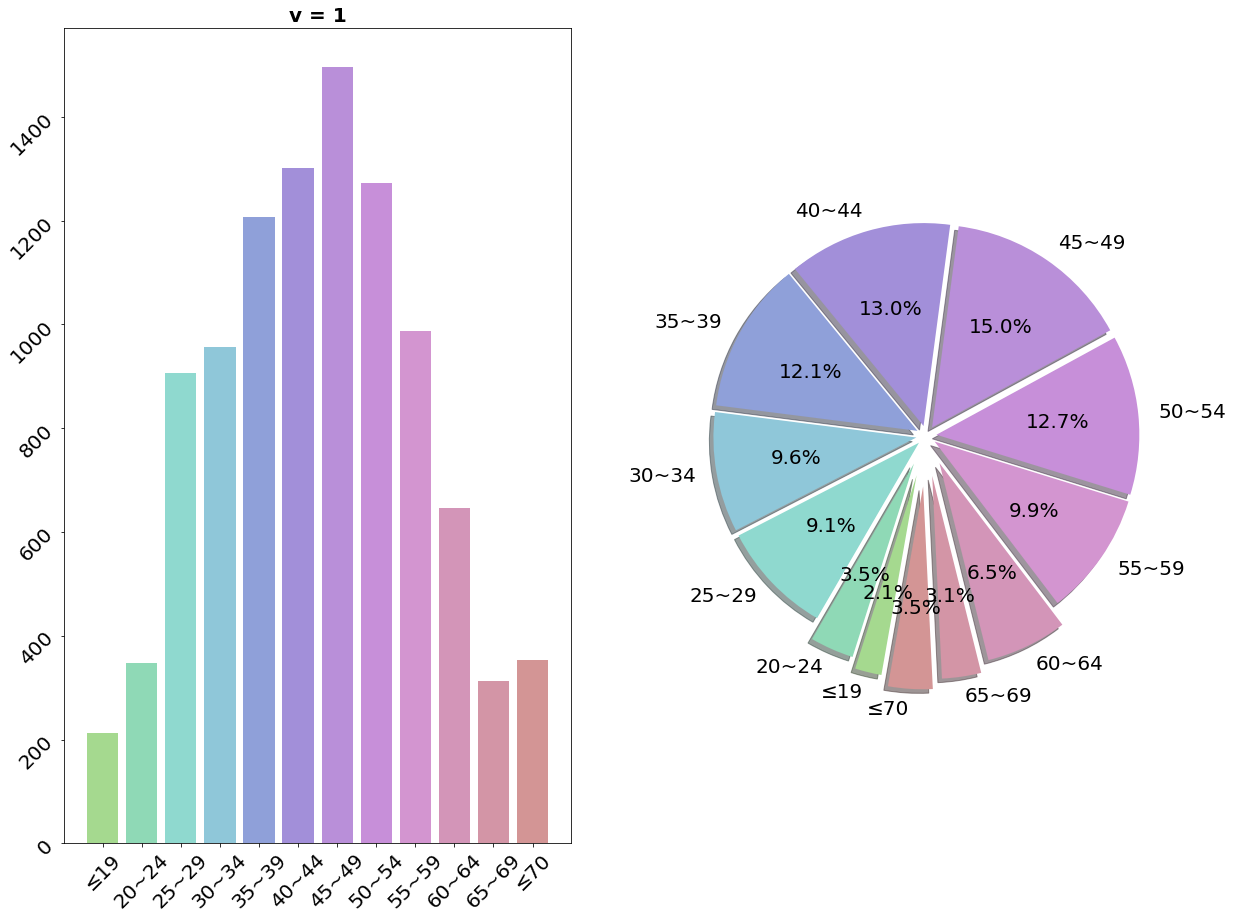

In [52]:
p = cus['cus_age'].value_counts()
p.sort_index(inplace=True)

explode = [0.2, 0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.2, 0.25]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
ages = ['≤19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '≤70']
colors = ['#a5d98f', '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9', '#c78fd9', '#d395d0', '#d395b8', '#d395a6', '#d39595']


fig, ax = plt.subplots(1, 2,figsize=(20,15))



ax[0].bar(ages,[p[i] for i in [0,20,25,30,35,40,45,50,55,60,65,70]], color = colors)
ax[1].pie([p[i] for i in [0,20,25,30,35,40,45,50,55,60,65,70]], labels = ages, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 10}

plt.rcParams.update({'font.size': 20})

ax[0].tick_params(labelrotation=45)
ax[0].set_title('v = 1',fontweight="bold", size=20)

plt.show()


<h1><span style="background-color:yellow;">--------------------------------12-23 이후------------------------------- </span></h1>

In [78]:
#act
#cus
#iem
#trd_kr
#trd_oss

In [79]:
act.columns = ['계좌번호', '고객번호', '계좌개설월']
cus.columns = ['고객번호', '성별', '연령대', '주소(시도)', '고객등급', '고객투자성향']
iem.columns = ['종목코드', '종목영문명', '종목한글명']
trd_kr.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드']
trd_oss.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드','거래통화코드','거래통화환율']

In [80]:
yz20 = cus['연령대'] == 20
yz25 = cus['연령대'] == 25
yz30 = cus['연령대'] == 30
yz35 = cus['연령대'] == 35

cus_yz = cus.loc[cus['연령대'].index[yz20 | yz25 | yz30 | yz35]]
cus_y = cus.loc[cus['연령대'].index[yz20 | yz25]]
cus_z = cus.loc[cus['연령대'].index[yz30 | yz35]]

In [81]:
import numpy as np

In [83]:
trd_kr

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3
...,...,...,...,...,...,...,...,...,...,...
3312659,a96172625957ac18f6debba0c3283f1aa4608c1d19a404...,20200630,2,13,13,A900250,1,1.0,1760.0,3
3312660,a96172625957ac18f6debba0c3283f1aa4608c1d19a404...,20200630,3,16,16,A011930,2,2.0,1340.0,3
3312661,c8d469612160df7251dd5d434ca25b0b8e2f40ace9a37f...,20200630,1,11,11,A019175,2,35.0,44000.0,3
3312662,1a046249ad088f30dae8038eb95d51427f10228677d4fb...,20200630,1,16,16,A037950,1,400.0,1810.0,4


In [84]:
trd_oss

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


In [85]:
sex_counts_yz = cus_yz['성별'].value_counts()

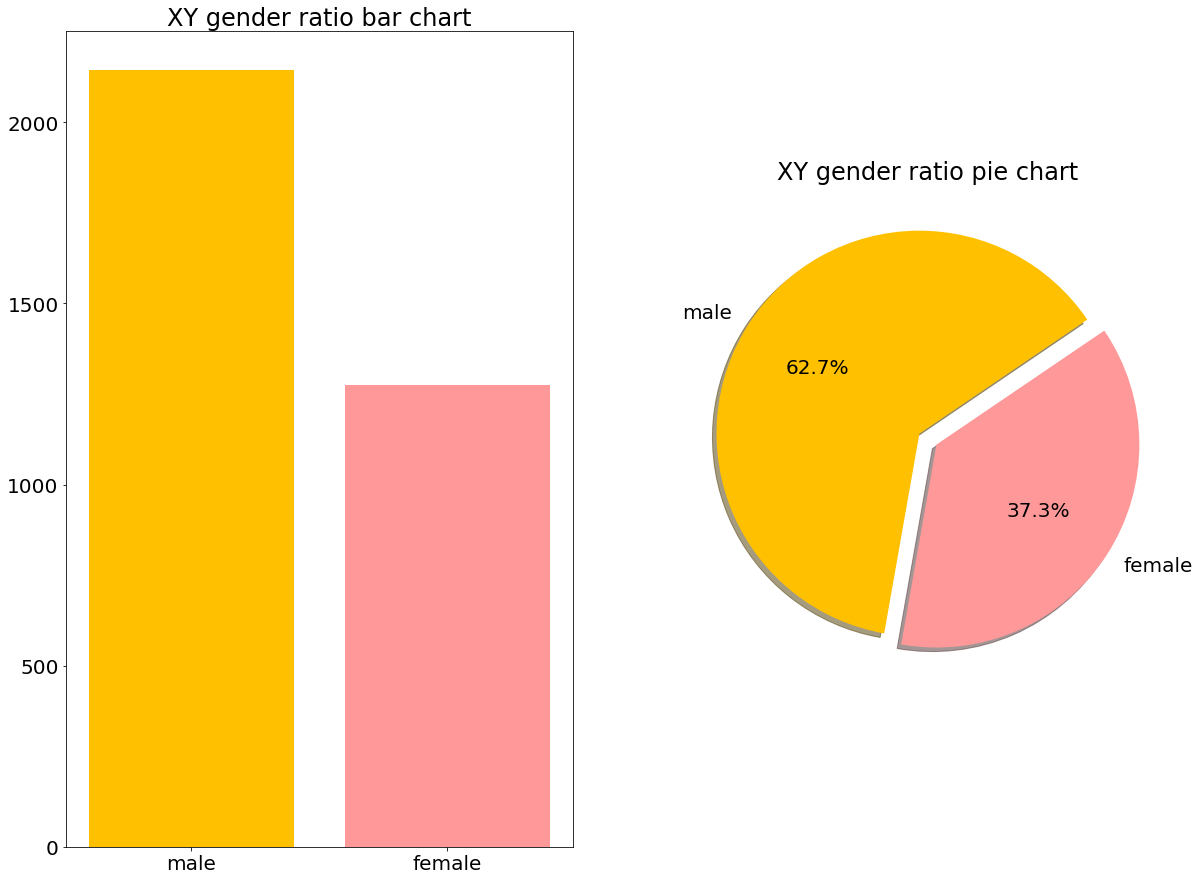

In [86]:
explode = [0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['#ffc000', '#ff9999']


fig, ax = plt.subplots(1,2,figsize=(20,15))


ax[0].bar(['male', 'female'],[sex_counts_yz[1], sex_counts_yz[2]], color = colors)
ax[1].pie([sex_counts_yz[1], sex_counts_yz[2]], labels=['male', 'female'], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 25}

ax[0].set_title('XY gender ratio bar chart')
ax[1].set_title('XY gender ratio pie chart')

#plt.scatter(['male', 'female'], [sex_counts[1], sex_counts[2]], marker= 'o', s=400, color= 'red', alpha=0.5)
plt.rcParams.update({'font.size': 20})

plt.show()

In [87]:
# result = pd.merge(trd_kr, trd_oss, on = '계좌번호')

In [88]:
ages = cus['연령대'].value_counts()
ages.sort_index(inplace=True)

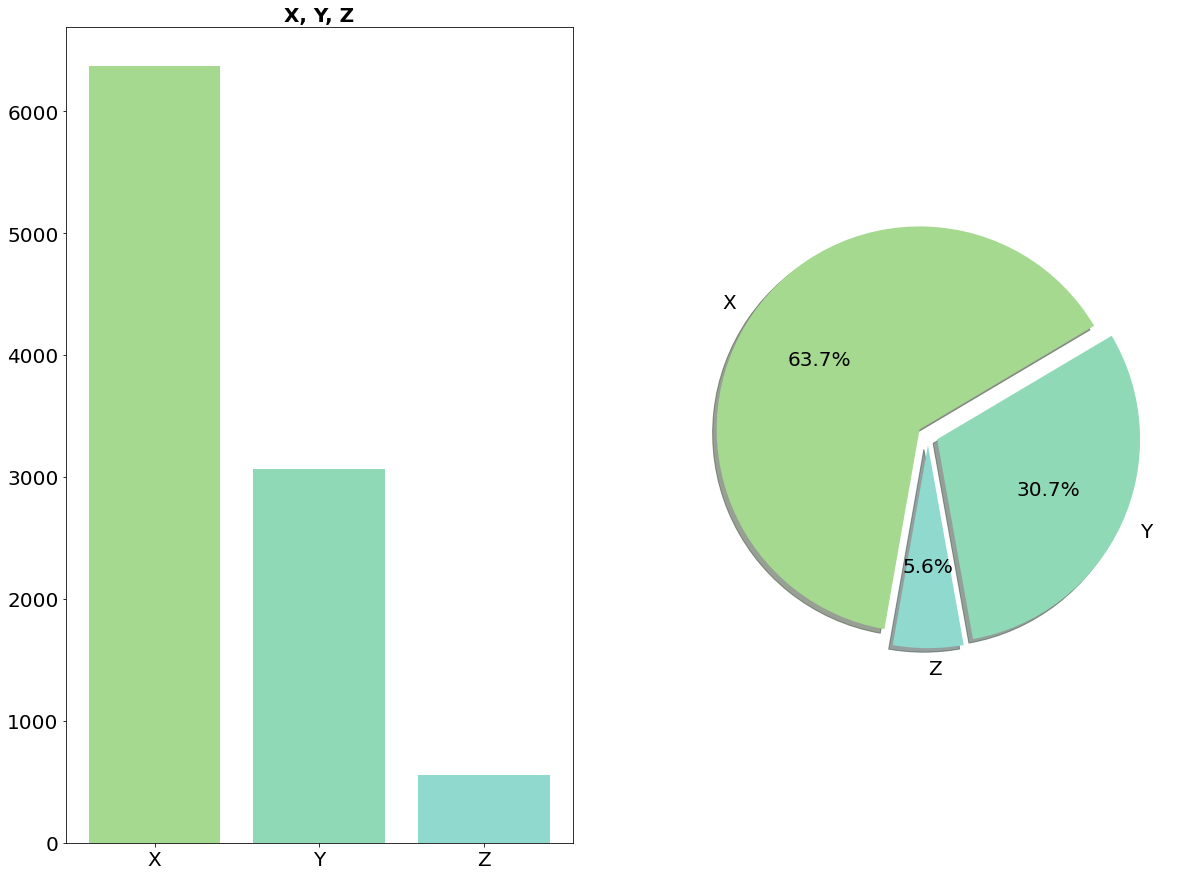

In [135]:
ages = cus['연령대'].value_counts()
ages.sort_index(inplace=True)

X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]
Y = ages[25] + ages[30] + ages[35]
Z = ages[0] + ages[20]

explode = [0.05, 0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
ages_range = ['X', 'Y', 'Z']
colors = ['#a5d98f', '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9', '#c78fd9', '#d395d0', '#d395b8', '#d395a6', '#d39595']


fig, ax = plt.subplots(1, 2,figsize=(20,15))



ax[0].bar(ages_range,[X, Y, Z], color = colors)
ax[1].pie([X, Y, Z], labels = ages_range, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 10}

plt.rcParams.update({'font.size': 20})

ax[0].tick_params(labelrotation=0)
ax[0].set_title('X, Y, Z',fontweight="bold", size=20)

plt.show()

In [90]:
ages

0      212
20     348
25     906
30     957
35    1207
40    1302
45    1496
50    1272
55     987
60     647
65     312
70     354
Name: 연령대, dtype: int64

Q. 가장 거래량이 많은 종목은?
Q. 삼성전자의 거래량은?
Q. 주문접수 시간대 - 체결 시간대
Q. 등급별 / 투자성향 별 거래량



In [91]:
Y / Z 주문매체 구분코드

SyntaxError: ignored

!! 1) act에서 계좌번호 - 고객번호 2)cus에서 고객번호 - 연령대 3) 연령대를 trd_oss에 갖다붙이기

계좌 개설월 - 첫 거래
-> 관심도 분석

성별

In [92]:
act

,계좌번호,고객번호,계좌개설월
0,8e1a987ebef2a3374ba558aeda4c7821de7808a11cfea1...,892f41b5002a79c9c93992acf60682f5698372aea023bd...,197912
1,eb161b66263589c3f38efd2277cec2a9a81e1ffa0a5255...,006ad32069efb2a8ce1a99542dfe41cb14e8e75685278a...,198702
2,01866857515304e9e1315e54863cc1108e1d46fff0d467...,1925ed2d8ed2cad53997f5b24722482137c4d1da4b555e...,199109
3,63a58b0fee2fa4dc467c043fde465846b65705659497c5...,7829365dc463ed8275c8b92518d58b3c8d983f00f7bf87...,199401
4,b563fb76d3d432d67198f194701ca67e895da4c2f24e8e...,36e05dde058cf7531bd4001ed3b976ef9562a9ecd9f43d...,199404
...,...,...,...
23954,83a634e16d41723f45abb7171d2720b9ec31c0bb7614a5...,f8f5f2a45565e6db2b4c6def8298c9bb865bbee85216d3...,201012
23955,fcc666cfa3def2e7023eaf1e28f39f0cb357d8cb9ec9f2...,484d70977d68defc52a7b800e098846c04829388217375...,200909
23956,4bf846f46e7c0b8547a2e04caf6573976eb621156f3032...,0931f895fe62bcdf3918b0ad6271c76d4f1934ff0e36eb...,201201
23957,bdb499007eb246137859668816eebddde9bfeb3efaec8e...,24653394d720670b49b1146b2793481bdca7aa7a84d11c...,199712


In [93]:
cus

,고객번호,성별,연령대,주소(시도),고객등급,고객투자성향
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


In [94]:
act_tmp = act.iloc[:,0:2]
cus_tmp = cus.iloc[:,0:3]

In [95]:
act_tmp

,계좌번호,고객번호
0,8e1a987ebef2a3374ba558aeda4c7821de7808a11cfea1...,892f41b5002a79c9c93992acf60682f5698372aea023bd...
1,eb161b66263589c3f38efd2277cec2a9a81e1ffa0a5255...,006ad32069efb2a8ce1a99542dfe41cb14e8e75685278a...
2,01866857515304e9e1315e54863cc1108e1d46fff0d467...,1925ed2d8ed2cad53997f5b24722482137c4d1da4b555e...
3,63a58b0fee2fa4dc467c043fde465846b65705659497c5...,7829365dc463ed8275c8b92518d58b3c8d983f00f7bf87...
4,b563fb76d3d432d67198f194701ca67e895da4c2f24e8e...,36e05dde058cf7531bd4001ed3b976ef9562a9ecd9f43d...
...,...,...
23954,83a634e16d41723f45abb7171d2720b9ec31c0bb7614a5...,f8f5f2a45565e6db2b4c6def8298c9bb865bbee85216d3...
23955,fcc666cfa3def2e7023eaf1e28f39f0cb357d8cb9ec9f2...,484d70977d68defc52a7b800e098846c04829388217375...
23956,4bf846f46e7c0b8547a2e04caf6573976eb621156f3032...,0931f895fe62bcdf3918b0ad6271c76d4f1934ff0e36eb...
23957,bdb499007eb246137859668816eebddde9bfeb3efaec8e...,24653394d720670b49b1146b2793481bdca7aa7a84d11c...


In [96]:
cus_tmp

,고객번호,성별,연령대
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70
...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35


In [97]:
result = pd.merge(act_tmp, cus_tmp, on = '고객번호', how='right')

In [98]:
result

,계좌번호,고객번호,성별,연령대
0,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20
1,28e8c3cd0299c7436f44eb9f140960e969907f144d3c0d...,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0
2,acb3a3e48fc80ebe89447b2bf29e79df801ef4881bad92...,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
3,8d5b316001d9c7d04c36ff37554111fa12196943d4e78b...,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
4,3ef2a4cfe5420010436ad7fe9513ef39631621c4092454...,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
...,...,...,...,...
23954,530858638ae97f3eae6ba84318790ec8abbced1c3b9bc4...,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35
23955,6e76f7efd3e36a7b1d679417a14c413455a88bafdebc3c...,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35
23956,21f135109922a4393eaa622c5e40be9f75ef5073e7606a...,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35
23957,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35


In [99]:
trd_oss

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


In [100]:
mydata = pd.merge(result, trd_oss, on = '계좌번호', how='right')

In [101]:
mydata

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70


In [102]:
'''X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]
Y = ages[25] + ages[30] + ages[35]
Z = ages[0] + ages[20]'''

'X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]\nY = ages[25] + ages[30] + ages[35]\nZ = ages[0] + ages[20]'

In [103]:
mydata['세대'] = ['Y' if mydata['연령대'][i] in [25, 30, 35] else ('Z' if mydata['연령대'][i] in [0, 20] else 'X') for i in range(len(mydata)) ]

In [104]:
mydata

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


In [105]:
sell = mydata[mydata['매매구분코드']==1]
buy = mydata[mydata['매매구분코드']==2]

In [106]:
sell[sell['종목코드']=='CNE100001526']['체결수량'].sum()

17800.0

In [107]:
buy[buy['종목코드']=='CNE100001526']['체결수량'].sum()

6500.0

In [108]:
YZ = mydata[mydata['세대'].isin(['Y','Z'])]

In [109]:
YZ['매매구분코드'].value_counts()

2    10844
1     3935
Name: 매매구분코드, dtype: int64

In [113]:
#trd_oss['주문매체구분코드'].value_counts()

3    26489
1     1991
4      821
Name: 주문매체구분코드, dtype: int64

In [114]:
trd_oss

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


<h1><u> 주문매체 </u></h>

In [124]:
idx = sorted(trd_oss['주문매체구분코드'].value_counts().index)

In [142]:
ORR_MDI = ['BranchTerminal', 'Wired-Terminal', 'Wireless MTS', 'HTS' ]

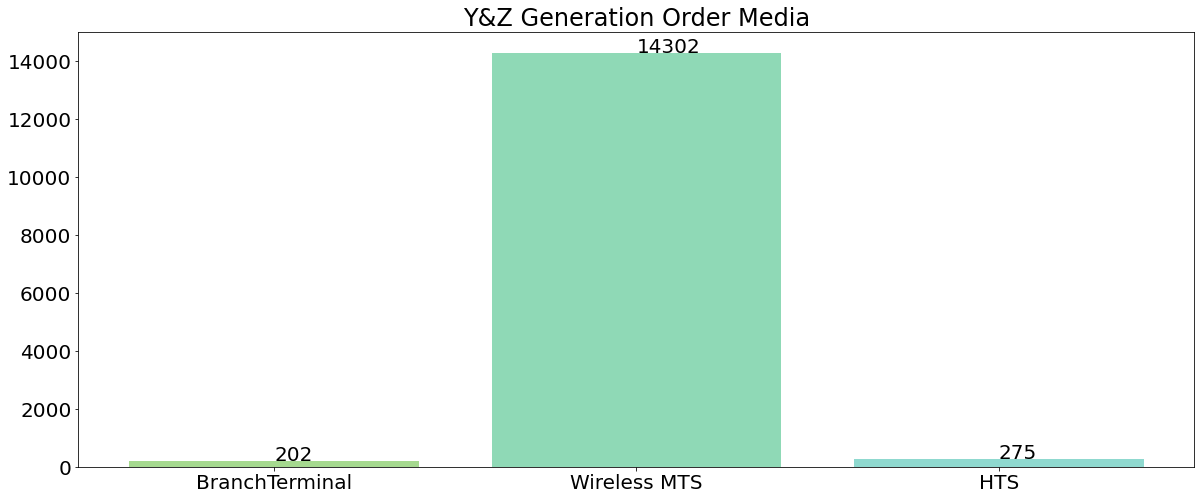

In [177]:
#-*-coding:utf-8-*-

plt.figure(figsize=(20,8))
plt.bar([ ORR_MDI[j-1] for j in idx], [YZ['주문매체구분코드'].value_counts()[i] for i in idx], color=['#a5d98f', '#8fd9b6', '#8fd9cf'])


'''x = [1,2,3,4,5]
y = [100,200,300,400,500]

import matplotlib.pyplot as plt

plt.bar(x,y)'''

for i in range(3):
  plt.text([ORR_MDI[j-1] for j in idx][i], [YZ['주문매체구분코드'].value_counts()[i] for i in idx][i], '{}'.format([YZ['주문매체구분코드'].value_counts()[i] for i in idx][i]) )
plt.title('Y&Z Generation Order Media')
plt.show()


In [178]:
YZ_men = YZ[YZ['성별']==1]
YZ_women = YZ[YZ['성별']==2]

[YZ['주문매체구분코드'].value_counts()[i] for i in idx]

[202, 14302, 275]

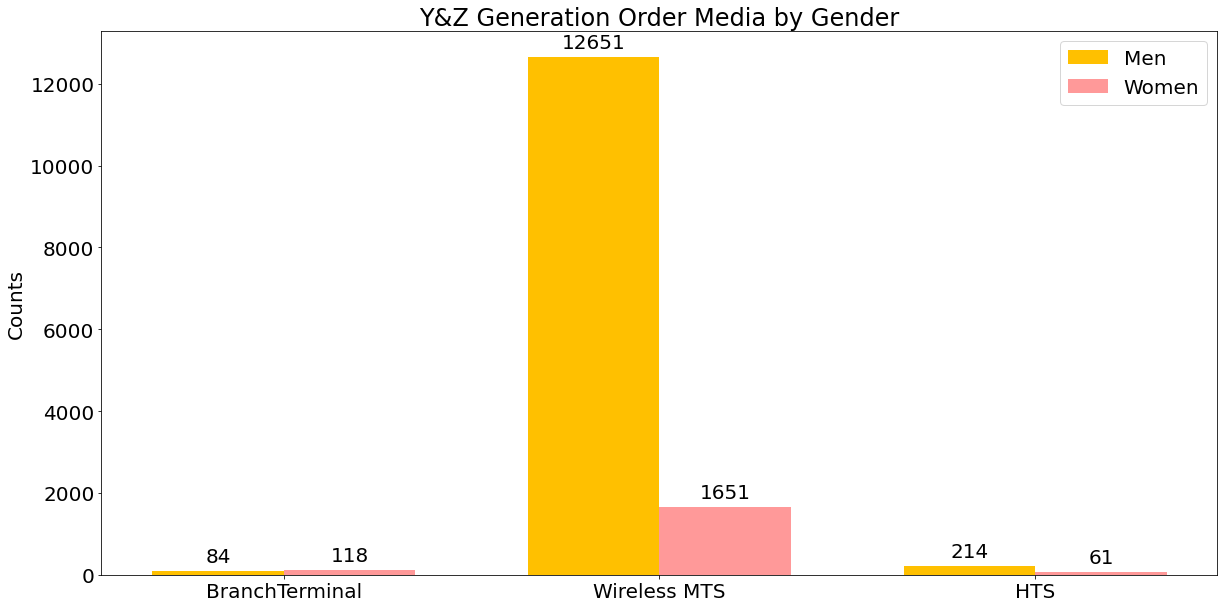

In [193]:
labels = [ ORR_MDI[j-1] for j in idx]
men_means = [YZ_men['주문매체구분코드'].value_counts()[i] for i in idx]
women_means = [YZ_women['주문매체구분코드'].value_counts()[i] for i in idx]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, width, color='#ffc000', label='Men')
rects2 = ax.bar(x + width/2, women_means, width, color='#ff9999', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Y&Z Generation Order Media by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


#fig.tight_layout()

plt.show()

<h1><u> 주문접수시간대 </u></h>

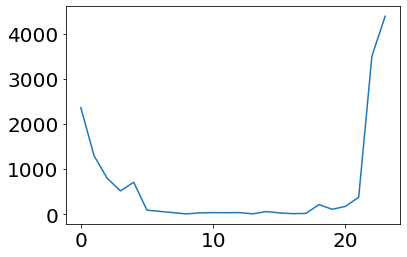

In [243]:
times = sorted(YZ['주문접수시간대'].value_counts().index)
plt.plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])

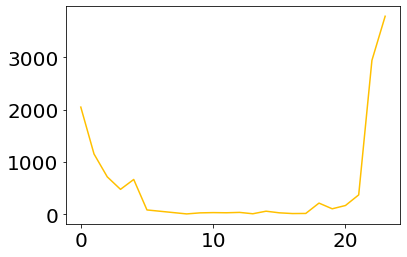

In [244]:
YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

plt.plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], color='#ffc000')

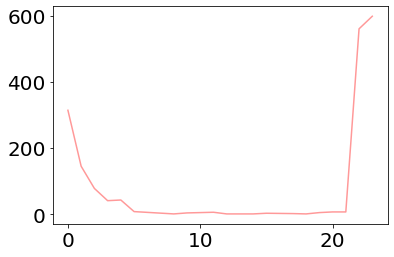

In [245]:
YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)

plt.plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], color='#ff9999')

Text(0.5, 1.0, 'Order Time (Women)')

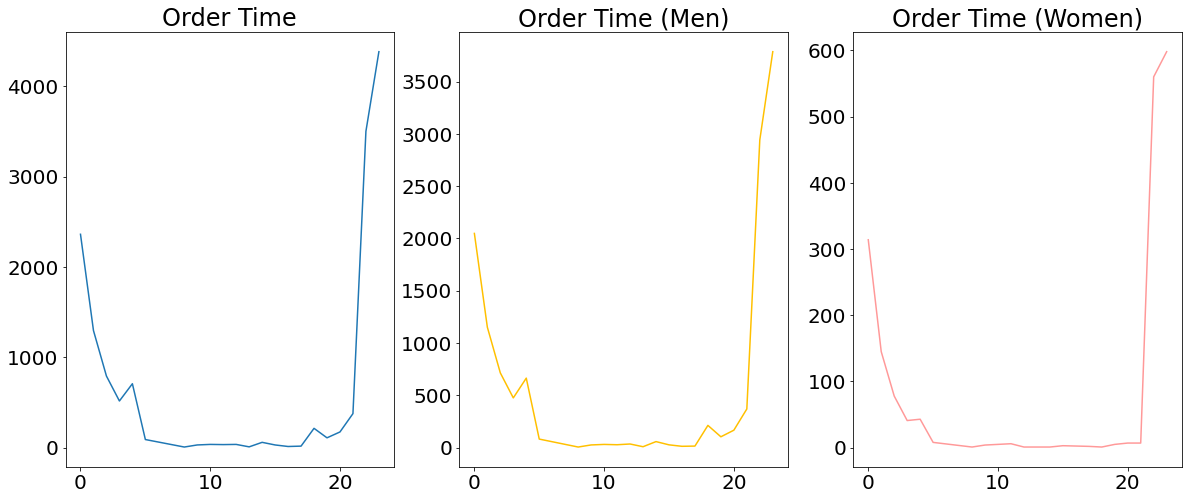

In [246]:
times = sorted(YZ['주문접수시간대'].value_counts().index)


YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)


fig, ax= plt.subplots(1,3, figsize=(20,8))


ax[0].plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])
ax[0].set_title('Order Time')

ax[1].plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], color='#ffc000')
ax[1].set_title('Order Time (Men)')

ax[2].plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], color='#ff9999')
ax[2].set_title('Order Time (Women)')


Text(0.5, 1.0, 'Order Time')

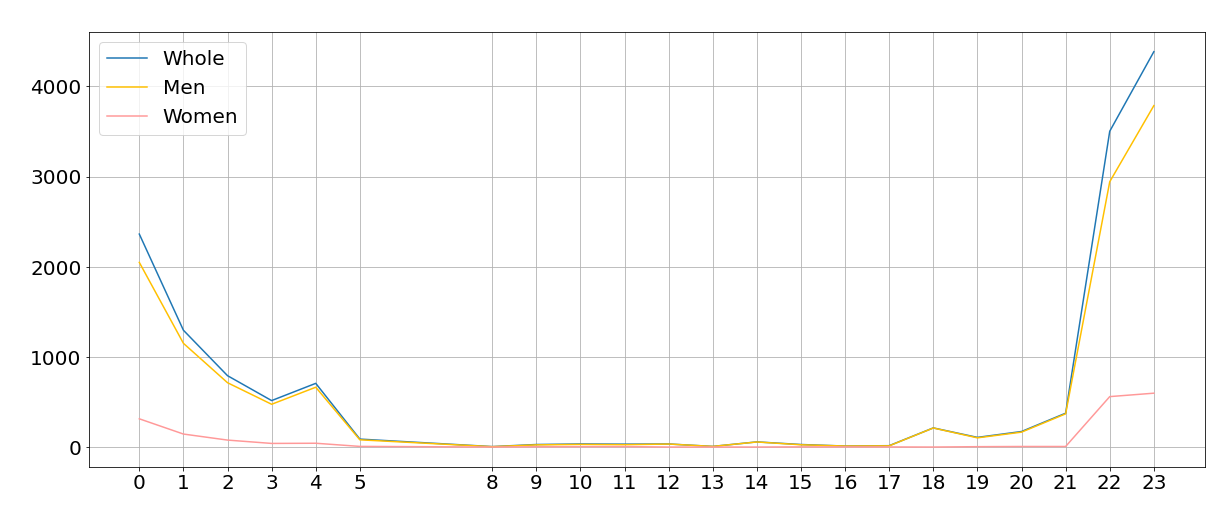

In [251]:
times = sorted(YZ['주문접수시간대'].value_counts().index)


YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)




plt.figure(figsize=(20,8))
plt.plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])
plt.plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], '#ffc000')
plt.plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], '#ff9999')
plt.xlabel('Time', color='white')
plt.ylabel('Orders', color='white')
plt.xticks(times)

plt.grid(True)
plt.legend(['Whole', 'Men', 'Women'], loc='upper left')

plt.title('Order Time', color='white')

<h1><u> 계좌계설월 </u></h>
- 흥미도 구하면, 어따 쓰지? (수익에 관련시켜야 할 듯ㅁ)

In [252]:
YZ

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3
...,...,...,...,...,...,...,...,...,...,...
3312659,a96172625957ac18f6debba0c3283f1aa4608c1d19a404...,20200630,2,13,13,A900250,1,1.0,1760.0,3
3312660,a96172625957ac18f6debba0c3283f1aa4608c1d19a404...,20200630,3,16,16,A011930,2,2.0,1340.0,3
3312661,c8d469612160df7251dd5d434ca25b0b8e2f40ace9a37f...,20200630,1,11,11,A019175,2,35.0,44000.0,3
3312662,1a046249ad088f30dae8038eb95d51427f10228677d4fb...,20200630,1,16,16,A037950,1,400.0,1810.0,4


<h1><u> 특정 주식에 대해서 (구매량 기준? iem 데이터 이용) </u></h>
- cus의 고객 등급 이용할 것, 성별

사는 지역으로도 스토리 만들 수 있을 듯?

,종목코드,종목영문명,종목한글명
0,A000060,Meritz Fire & Marine Insurance ...,메리츠화재해상보험보통주 ...
1,A000120,CJ LOGISTICS ...,씨제이대한통운보통주 ...
2,A000540,HeungkukFire&MarineInsurance ...,흥국화재해상보험보통주 ...
3,A00088K,HANWHA(3PB) ...,한화3우선주(신형) ...
4,A000950,Chonbang ...,전방보통주 ...
...,...,...,...
4680,US9839191015,Xilinx ...,자일링스 ...
4681,US9884981013,Yum! Brands ...,염! 브랜즈 ...
4682,VGG4095T1075,Greenland Tech ...,Greenland Tech ...
4683,VN000000SHB9,Sahabank ...,Sahabank ...
